# Data Mapping

By: Jonathan <br>
Requested by Elena <br>
Purpose is to map CAIDA user data to a world map.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import geoplot as gplt
import pycountry_convert as pc
import mapclassify as mc

In [2]:
# Reading Data
caida_data = pd.read_csv('CAIDA_users_by country_2020.csv')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
# Creating common col to merge data
def country_to_continent(iso_3):
    try:
        return pc.country_alpha3_to_country_alpha2(iso_3)
    except:
        return 'FALSE'

world['iso_a2'] = world['iso_a3'].apply(country_to_continent)
world = world[world['iso_a2'] != 'FALSE']

In [4]:
# Dropping whitespace so merge can work
caida_data['Cntry'] = caida_data['Cntry'].apply(str.strip)

In [5]:
# Merging
merged = world.merge(caida_data, left_on='iso_a2', right_on='Cntry', how='left')
merged = merged.fillna(value=0)
merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,iso_a2,Cntry,num_users,num_ASes
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJ,0,0.0,0.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZ,TZ,5.0,4.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",EH,0,0.0,0.0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CA,CA,269.0,64.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",US,US,12494.0,516.0
...,...,...,...,...,...,...,...,...,...,...
167,2103721,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",MK,0,0.0,0.0
168,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",RS,RS,22.0,8.0
169,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",ME,0,0.0,0.0
170,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",TT,0,0.0,0.0


In [6]:
# Creating Rep points
merged_centroids = merged.copy()
merged_centroids['geometry'] = merged['geometry'].representative_point()
merged_centroids = merged_centroids[merged_centroids['Cntry'] != 0]

C:\Users\jonat\anaconda3\envs\geopandas_env\lib\site-packages\geoplot\geoplot.py:1004: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


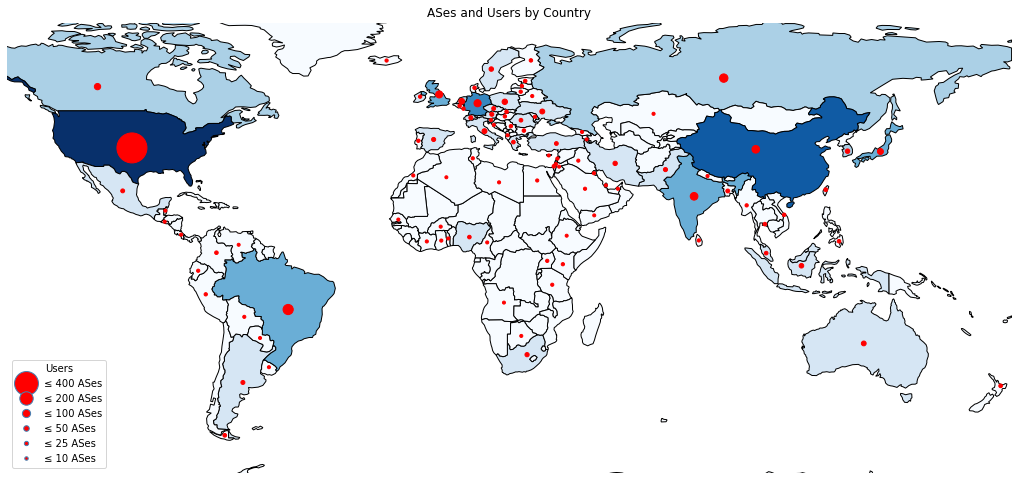

In [7]:
# Plotting points and creating layered geoplots
scheme_one = mc.FisherJenks(merged['num_users'], k=7)

ax = gplt.choropleth(
    merged,
    hue='num_users',
    scheme=scheme_one,
    cmap='Blues',
    legend=True,
    figsize=(18,14)
)
gplt.pointplot(
    merged_centroids,
    ax=ax,
    scale='num_ASes',
    color='red',
    legend=True,
    limits=(3, 30),
    legend_values=[400, 200, 100, 50, 25, 10],
    legend_labels=['≤ 400 ASes', '≤ 200 ASes', '≤ 100 ASes', '≤ 50 ASes', '≤ 25 ASes', '≤ 10 ASes']
)
plt.title("ASes and Users by Country")
ax.get_legend().set_title("Users")

plt.savefig('ases_and_users_by_country.png')